# WEATHER ANALYSIS

In [1]:
# Import Dependencies
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, func

import numpy as np
import pandas as pd
from pandas import DataFrame

import datetime as dt
from datetime import datetime

import seaborn as sns
from sqlalchemy import create_engine, inspect

 # REFLECT TABLES INTO SQLALCHEMY ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# INITIAL DATABASE CONNECTION

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

 # INSPECTOR

In [4]:
# Utilize Inspector to identify tables

inspector = inspect(engine)

tables = inspector.get_table_names()

tables

['measurement', 'station']

In [5]:
# Inspect Columns in "measurement" table
columns = inspector.get_columns("measurement")
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [6]:
# Inspect Columns in "station" table 
columns = inspector.get_columns("station")
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

# PANDAS

In [7]:
# Query for the last date of measurements
query = "SELECT max(date) from measurement"
engine.execute(query).fetchall()

[('2017-08-23',)]

In [8]:
# Do this only once!
db = engine.connect()

In [9]:
# Using the last date from above perform a query to retrieve the last 12 months of precipitation data
# Query for date and precipitation
query = """
            SELECT
                date,
                prcp
            FROM
                measurement
            WHERE
                date >= '2016-08-23'
                and prcp is not null
        """

# Query All Records in the the Database
df = pd.read_sql(query, con=db)

# Preview the Data
df.head(10)

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


In [10]:
# Query for date and precipitation
df.tail()

,date,prcp
2016,2017-08-17,0.13
2017,2017-08-19,0.09
2018,2017-08-21,0.56
2019,2017-08-22,0.50
2020,2017-08-23,0.45


In [11]:
# Query for date and precipitation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2021 non-null   object 
 1   prcp    2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.7+ KB


In [12]:
# Sort the dataframe by date
df.date.value_counts()

2016-10-25    7
2017-03-10    7
2017-04-05    7
2017-02-08    7
2017-01-31    7
             ..
2017-08-12    3
2017-08-01    3
2017-08-18    3
2017-08-20    2
2017-08-05    2
Name: date, Length: 366, dtype: int64

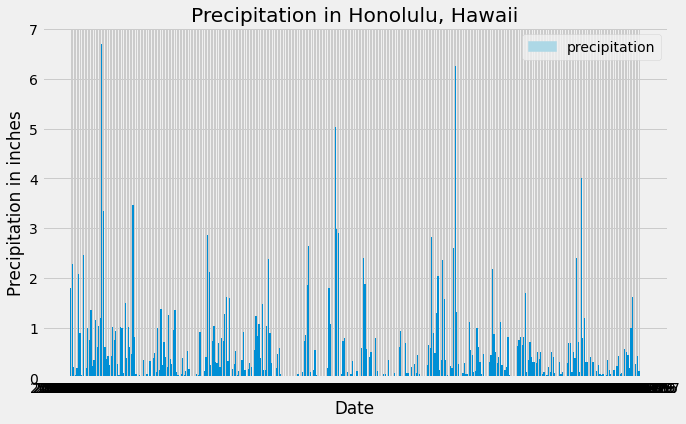

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Plot the data using pandas.plot method
plt.figure(figsize=(10,6))
plt.bar(df.date, df.prcp)

lightblue_patch = mpatches.Patch(color='lightblue', label="precipitation")
plt. legend(handles=[lightblue_patch])
plt.ylabel("Precipitation in inches")
plt.xlabel("Date")
plt.title("Precipitation in Honolulu, Hawaii")
plt.show()

In [14]:
df.groupby("date").describe()

prcp                                                       
           count      mean       std   min     25%    50%     75%   max
date                                                                   
2016-08-23   6.0  0.451667  0.706468  0.00  0.0275  0.100  0.5625  1.79
2016-08-24   6.0  1.555000  0.840541  0.08  1.2775  1.800  2.1500  2.28
2016-08-25   7.0  0.077143  0.071813  0.00  0.0300  0.080  0.0950  0.21
2016-08-26   6.0  0.016667  0.016330  0.00  0.0025  0.015  0.0275  0.04
2016-08-27   5.0  0.064000  0.081731  0.00  0.0000  0.020  0.1200  0.18
...          ...       ...       ...   ...     ...    ...     ...   ...
2017-08-19   3.0  0.030000  0.051962  0.00  0.0000  0.000  0.0450  0.09
2017-08-20   2.0  0.005000  0.007071  0.00  0.0025  0.005  0.0075  0.01
2017-08-21   3.0  0.193333  0.317700  0.00  0.0100  0.020  0.2900  0.56
2017-08-22   3.0  0.166667  0.288675  0.00  0.0000  0.000  0.2500  0.50
2017-08-23   4.0  0.132500  0.215000  0.00  0.0000  0.040  0.1725  0.45

[366 rows x 8 columns]

In [15]:
# Design a query to show how many stations are available in this dataset?
query = """
            SELECT
                *
            FROM
                station
        """

# Query All Records in the the Database
df2 = pd.read_sql(query, con=db)

# Preview the Data
df2.head(10)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [16]:
# Design a query to show how many stations are available in this dataset?
print(f"There are {len(df2)} stations in this database")

There are 9 stations in this database


In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
query = """
            SELECT
                s.station,
                count(*) as record_count
            FROM
                measurement m
            JOIN station s on m.station=s.station
            GROUP BY
                s.station
            ORDER BY
                record_count desc
        """

# Query All Records in the the Database
df2 = pd.read_sql(query, con=db)

# Preview the Data
df2.head(10)

,station,record_count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


### WEATHER STATION USC00519281 HAD THE MOST OBSERVATIONS WITH 2772

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

query = """
            SELECT
                m.*,
                s.id as station_id,
                s.name,
                s.latitude,
                s.longitude,
                s. elevation
            FROM
                measurement m
            JOIN station s on m.station=s.station
            WHERE
                m.date >= '2016-08-23'
        """

# Query All Records in the the Database
all_data = pd.read_sql(query, con=db)

# Preview the Data
all_data.head(10)

,id,station,date,prcp,tobs,station_id,name,latitude,longitude,elevation
0,2364,USC00519397,2016-08-23,0.00,81.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2365,USC00519397,2016-08-24,0.08,79.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,2366,USC00519397,2016-08-25,0.08,80.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,2367,USC00519397,2016-08-26,0.00,79.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,2368,USC00519397,2016-08-27,0.00,77.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
5,2369,USC00519397,2016-08-28,0.01,78.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
6,2370,USC00519397,2016-08-29,0.00,78.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
7,2371,USC00519397,2016-08-30,0.00,79.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
8,2372,USC00519397,2016-08-31,0.13,80.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
9,2373,USC00519397,2016-09-01,0.00,81.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [19]:
all_data.station.value_counts()

USC00519397    361
USC00519281    352
USC00516128    349
USC00513117    343
USC00519523    337
USC00514830    305
USC00517948    183
Name: station, dtype: int64

In [20]:
all_data.loc[all_data.station == "USC00519281"].describe()

,id,prcp,tobs,station_id,latitude,longitude,elevation
count,352.000000,352.000000,352.000000,352.0,3.520000e+02,3.520000e+02,3.520000e+02
mean,14783.500000,0.198949,73.107955,7.0,2.145167e+01,-1.578489e+02,3.290000e+01
std,101.757883,0.419182,4.733315,0.0,1.458686e-13,7.115542e-13,2.134663e-13
min,14608.000000,0.000000,59.000000,7.0,2.145167e+01,-1.578489e+02,3.290000e+01
25%,14695.750000,0.000000,70.000000,7.0,2.145167e+01,-1.578489e+02,3.290000e+01
50%,14783.500000,0.060000,74.000000,7.0,2.145167e+01,-1.578489e+02,3.290000e+01
75%,14871.250000,0.190000,77.000000,7.0,2.145167e+01,-1.578489e+02,3.290000e+01
max,14959.000000,2.980000,83.000000,7.0,2.145167e+01,-1.578489e+02,3.290000e+01


In [21]:
all_data.loc[all_data.station == "USC00519281"].tobs.describe()

count    352.000000
mean      73.107955
std        4.733315
min       59.000000
25%       70.000000
50%       74.000000
75%       77.000000
max       83.000000
Name: tobs, dtype: float64

### MAX = 83.0, MIN = 59.0, AVG = 73.10

In [22]:
# Query to obtain the Weather Station with the Max, Min & Avg TOBS

query = """
            SELECT
                max(m.station),
                min(m.tobs),
                max(m.tobs),
                avg(m.tobs)
            FROM
                measurement m
            JOIN station s on m.station=s.station
            WHERE
                m.station >= "USC00519281"
        """

# Query All Records in the the Database
aggregate = pd.read_sql(query, con=db)

# Preview the Data
aggregate.head(10)

,max(m.station),min(m.tobs),max(m.tobs),avg(m.tobs)
0,USC00519523,54.0,87.0,73.569137


In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station

query = """
            SELECT
                m.*,
                s.id as station_id,
                s.name,
                s.latitude,
                s.longitude,
                s.elevation  
            FROM
                measurement m
            JOIN station s on m.station=s.station
            WHERE
                m.station = 'USC00519281'
                and date >= '2016-08-23'
        """

# Query All Records in the the Database
all_data2 = pd.read_sql(query, con=db)

# Preview the Data
all_data2.head(10)

,id,station,date,prcp,tobs,station_id,name,latitude,longitude,elevation
0,14608,USC00519281,2016-08-23,1.79,77.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
1,14609,USC00519281,2016-08-24,2.15,77.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,14610,USC00519281,2016-08-25,0.06,80.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
3,14611,USC00519281,2016-08-26,0.01,80.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
4,14612,USC00519281,2016-08-27,0.12,75.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
5,14613,USC00519281,2016-08-28,0.60,73.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
6,14614,USC00519281,2016-08-29,0.35,78.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,14615,USC00519281,2016-08-30,0.00,77.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
8,14616,USC00519281,2016-08-31,0.24,78.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
9,14617,USC00519281,2016-09-01,0.02,80.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9


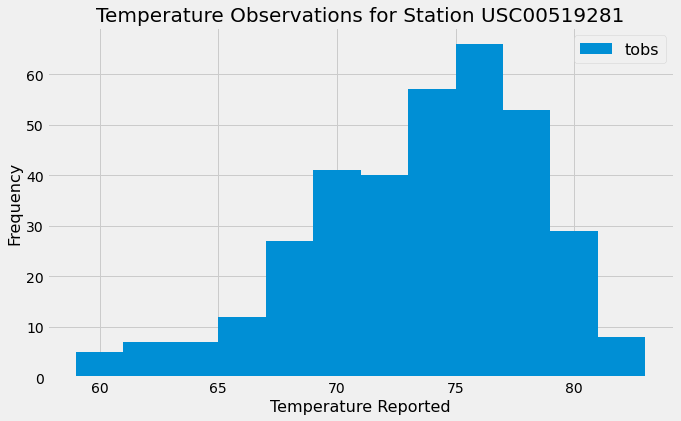

In [24]:
plt.figure(figsize=(10,6))
plt.hist(all_data2.tobs, bins=12)

plt.title("Temperature Observations for Station USC00519281", fontsize=20)
plt.xlabel("Temperature Reported", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.legend(['tobs'],loc='best', fontsize=16)

plt.show()